# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
df = pd.read_csv('./college_completion.csv')
# the

In [4]:
print( df.shape, '\n') # (3798,63) 3798 observations, 63 variables
print( df.head(), '\n') # Notice how the '...' column that hides a lot of variables
#variables include College name, state, level, private/public, hbcu, flagship, x/y coords, website, student count, etc..

(3798, 63) 

   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges--Arts & Sciences  NaN      NaN  ..

In [5]:
print(pd.crosstab(df['control'],df['level']),'\n')
print(pd.crosstab(df['control'],df['level'], normalize = 'all'),'\n')

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632 

level                     2-year    4-year
control                                   
Private for-profit      0.122433  0.138757
Private not-for-profit  0.017904  0.310690
Public                  0.243813  0.166403 



<Axes: xlabel='grad_100_value', ylabel='Count'>

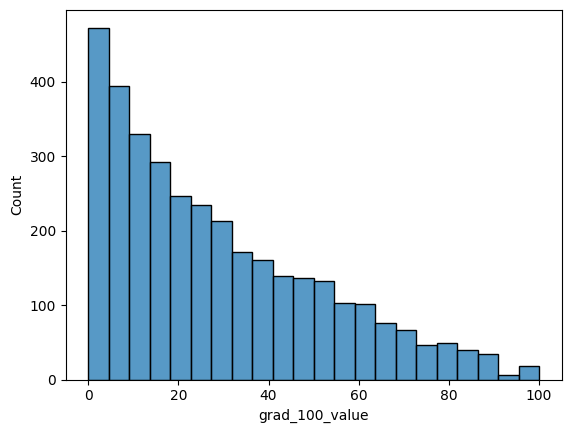

In [6]:
import seaborn as sns
sns.histplot(df['grad_100_value'])

<Axes: xlabel='grad_100_value', ylabel='Density'>

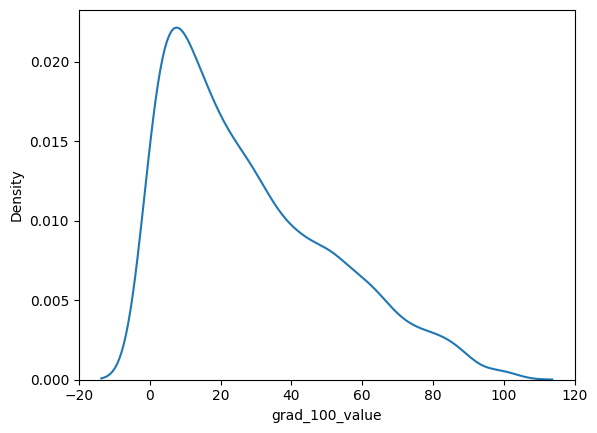

In [7]:
sns.kdeplot(df['grad_100_value'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='grad_100_value'>

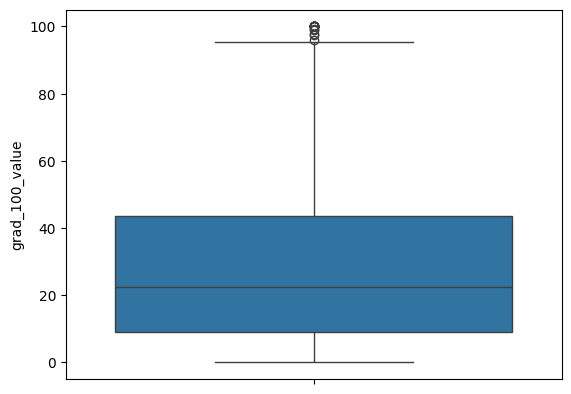

In [8]:
sns.boxplot(df['grad_100_value'])

In [9]:
df['grad_100_value'].describe()

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='grad_100_value', ylabel='Density'>

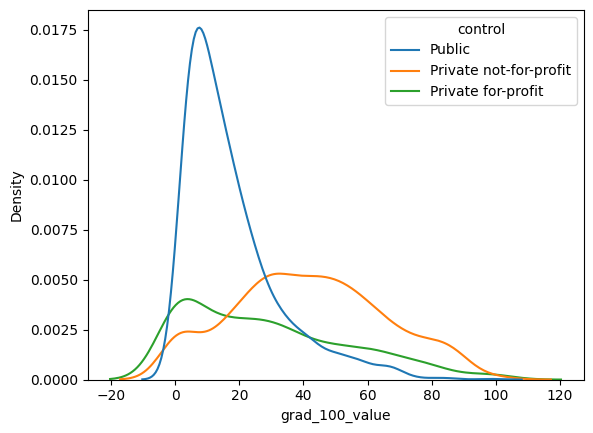

In [10]:
sns.kdeplot(data=df,x='grad_100_value',hue='control')
#public Schools have a much lower rate of bachelors completion on average, less than private for-profit, and less than private not-for-profit
# private not-for-profit have the highest rate of graduation

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [11]:
#2 The codebook lists all variable definitions an options, some have missing values denoted by a "."
#I think the data dictionary is incredibly thorough and easy to navigate but it is strange how all
#the variables are categorical even if they would make more sense as numeric


In [12]:
#3 total office visits in current yr (ADM_H_PHYEVT) vs age group (DEM_AGE) should show an interesting relationship between frequency of visit and age
#Income group will also be included (DEM_INCOME)

In [13]:
df2 = pd.read_csv('./sfpuf2021_1_fall.csv')

<ipython-input-13-6bcf8995fdf7>:1: DtypeWarning: Columns (43,46,49,50,51,52,53,73,76,77,81,82,83,85,90,92,99,100,105,106,107,112,113,118,119,123,124,125,126,128,129,135,136,137,138,139,140,142,143,151,155,156,161,163,172,176,183,184,185,186,191,192,193,194,195,197,198,199,200,208,209,210,211,214,217,218,219,220,221,222,223,224,225,227,229) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('./sfpuf2021_1_fall.csv')


In [14]:
print( df2.shape, '\n')
print( df2.head(), '\n')

(12783, 337) 

     PUF_ID  SURVEYYR  VERSION  ADM_H_MEDSTA  ADM_H_GHPSW  ADM_H_PDRS  \
0  21000003      2021        1             1            2         1.0   
1  21000004      2021        1             1            2         1.0   
2  21000005      2021        1             1            2         1.0   
3  21000011      2021        1             1            2         1.0   
4  21000012      2021        1             1            1         1.0   

   ADM_OP_MDCD  ADM_DUAL_FLAG_YR  ADM_FFS_FLAG_YR  ADM_MA_FLAG_YR  ...  \
0            1                 1                3               1  ...   
1            1                 1                3               1  ...   
2            1                 1                3               1  ...   
3            1                 1                3               1  ...   
4            2                 3                1               3  ...   

        PUFF091       PUFF092       PUFF093      PUFF094      PUFF095  \
0    988.252590   5273.44151

<Axes: ylabel='ADM_H_PHYEVT'>

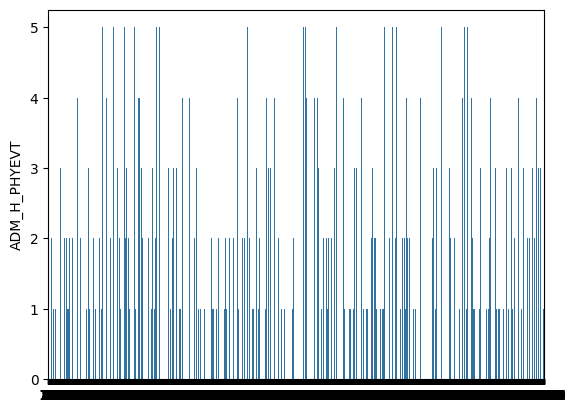

In [15]:
#4
sns.barplot(df2['ADM_H_PHYEVT'])
#0: no office visit - clear outlier
#1: 1-5 visits
#2: 6-10 visits
#3: 11-15 visits
#4: 16-20 visits
#5: 21 or more visits

<Axes: xlabel='DEM_AGE', ylabel='Count'>

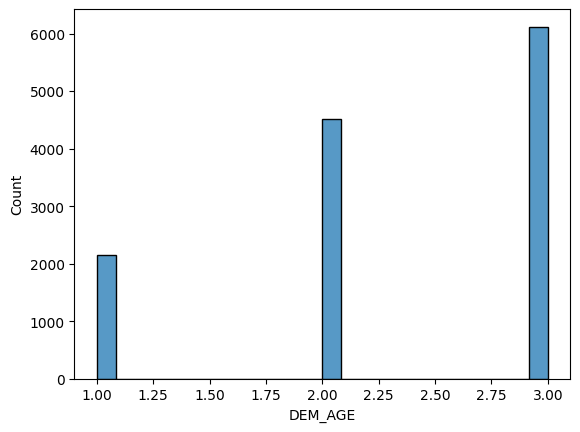

In [16]:
sns.histplot(df2['DEM_AGE'])
#1 = AGE<65 years old
#2 = AGE 65-74 years
#3 = AGE 75+ years

<Axes: xlabel='DEM_INCOME', ylabel='Count'>

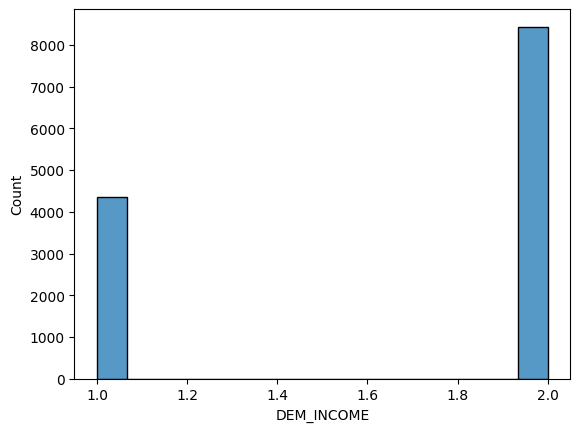

In [17]:
sns.histplot(df2['DEM_INCOME'])
#1: <$25,000
#2: >=$25,000

In [18]:
#5

In [19]:
#6

In [20]:
#7